In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt


In [17]:
images = glob.glob('images2/*.jpg')

In [18]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# 6x9 pattern
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [19]:
GRIDSIZE = 25   ## 25 mm / 13 mm

objp[:, :2] = np.mgrid[0:9*GRIDSIZE:GRIDSIZE,0:6*GRIDSIZE:GRIDSIZE].T.reshape(-1,2)
print(objp)

[[  0.   0.   0.]
 [ 25.   0.   0.]
 [ 50.   0.   0.]
 [ 75.   0.   0.]
 [100.   0.   0.]
 [125.   0.   0.]
 [150.   0.   0.]
 [175.   0.   0.]
 [200.   0.   0.]
 [  0.  25.   0.]
 [ 25.  25.   0.]
 [ 50.  25.   0.]
 [ 75.  25.   0.]
 [100.  25.   0.]
 [125.  25.   0.]
 [150.  25.   0.]
 [175.  25.   0.]
 [200.  25.   0.]
 [  0.  50.   0.]
 [ 25.  50.   0.]
 [ 50.  50.   0.]
 [ 75.  50.   0.]
 [100.  50.   0.]
 [125.  50.   0.]
 [150.  50.   0.]
 [175.  50.   0.]
 [200.  50.   0.]
 [  0.  75.   0.]
 [ 25.  75.   0.]
 [ 50.  75.   0.]
 [ 75.  75.   0.]
 [100.  75.   0.]
 [125.  75.   0.]
 [150.  75.   0.]
 [175.  75.   0.]
 [200.  75.   0.]
 [  0. 100.   0.]
 [ 25. 100.   0.]
 [ 50. 100.   0.]
 [ 75. 100.   0.]
 [100. 100.   0.]
 [125. 100.   0.]
 [150. 100.   0.]
 [175. 100.   0.]
 [200. 100.   0.]
 [  0. 125.   0.]
 [ 25. 125.   0.]
 [ 50. 125.   0.]
 [ 75. 125.   0.]
 [100. 125.   0.]
 [125. 125.   0.]
 [150. 125.   0.]
 [175. 125.   0.]
 [200. 125.   0.]]


images3/IMG_20230326_145005.jpg


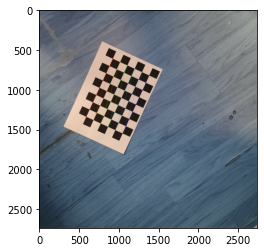

images3/IMG_20230326_145013.jpg


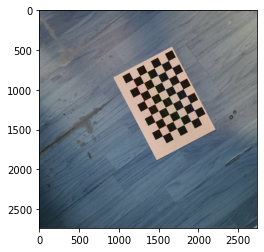

images3/IMG_20230326_145034.jpg


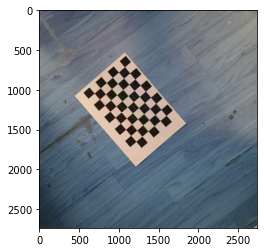

images3/IMG_20230326_144941.jpg


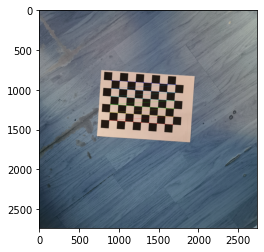

images3/IMG_20230326_144949.jpg


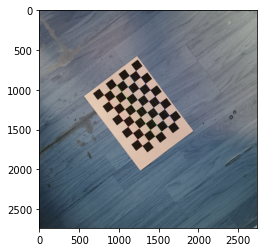

images3/IMG_20230326_144957.jpg


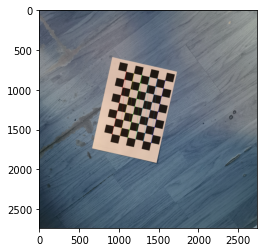

images3/IMG_20230326_145030.jpg


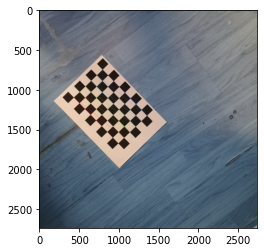

images3/IMG_20230326_144935.jpg


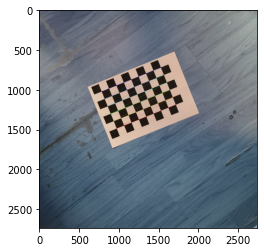

images3/IMG_20230326_144953.jpg


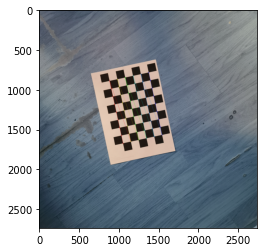

images3/IMG_20230326_144921.jpg


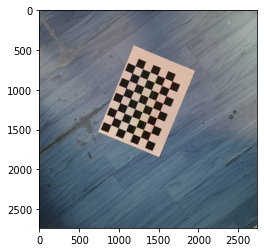

images3/IMG_20230326_144945.jpg


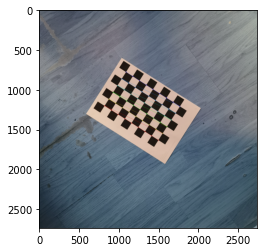

images3/IMG_20230326_144913.jpg


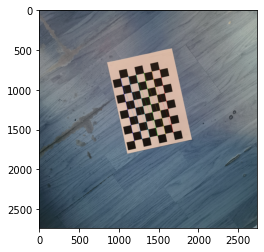

images3/IMG_20230326_145009.jpg


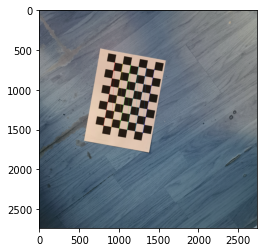

images3/IMG_20230326_145021.jpg


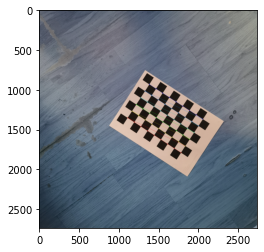

images3/IMG_20230326_144929.jpg


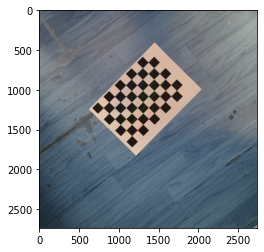

images3/IMG_20230326_145001.jpg


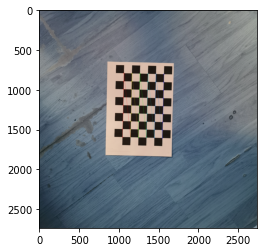

images3/IMG_20230326_145024.jpg


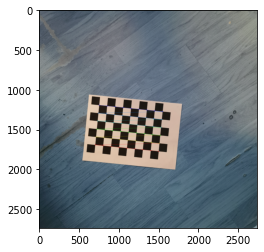

images3/IMG_20230326_145017.jpg


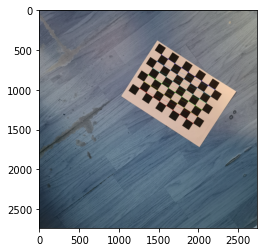

images3/IMG_20230326_145014.jpg


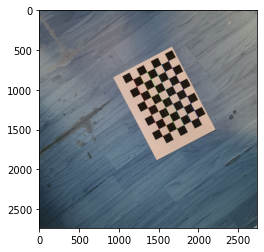

In [20]:
# We need at least 10 images
# Consider an image of a chess board.
# The important input data needed for calibration of the camera is the set of 3D real world points and the corresponding 2D coordinates of these points in the image
# 2D image points are OK which we can easily find from the image. (These image points are locations where two black squares touch each other in chess boards)
for fname in images:
    img = cv.imread(fname)
    print(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (9,6), corners2, ret)
        plt.imshow(img)
        plt.show()

In [21]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [23]:
img = cv.imread('images2/IMG_20230326_145014.jpg') #far: IMG_20230326_171218.jpg || close: IMG_20230326_145014.jpg
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

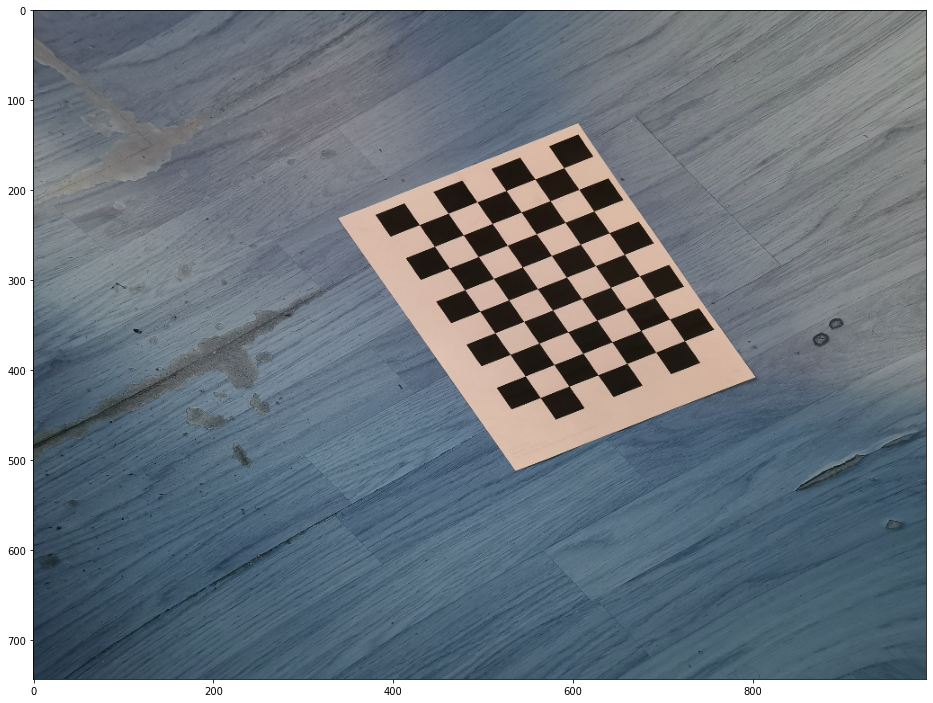

In [24]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(16,16))
plt.imshow(dst)
plt.show()

In [25]:
print(dst.shape)

(744, 993, 3)


In [ ]:
# Define the followings: 1 st image 1st corner 3D coordinates, 1 st image 1st corner 2D coordinates, image resolution, fx, fy, principal point x, principal point y, skew, first image translation vector,
# first image rotation vector, K matrix, distortion coefficients, reprojection error

In [26]:
print("1 st image 1st corner 3D coordinates: ", np.asarray(objpoints)[0,0,:])

1 st image 1st corner 3D coordinates:  [0. 0. 0.]


In [28]:
imgpointsnp = np.asarray(imgpoints).reshape(-1,1026,2) #42->2106->...->far: 1350 || close: 1026
print("1 st image 1st corner 2D coordinates: ", imgpointsnp[0,0,:])

1 st image 1st corner 2D coordinates:  [1383.3354  822.0774]


In [29]:
print("Image resolution: ", gray.shape)

Image resolution:  (2736, 2736)


In [ ]:
#The focal length is the distance between the center of the camera and the image plane.

In [30]:
print("Focal length x: ", mtx[0,0])

Focal length x:  21824.595928701347


In [31]:
print("Focal length y: ", mtx[1,1])

Focal length y:  21915.286686699346


In [ ]:
#The principal point represents the center of the image, or the point where the image appears to be focused. It affects the accuracy of the calibration results.

In [32]:
print("Principal point x: ", mtx[0,2])

Principal point x:  1340.5761994396405


In [33]:
print("Principal point y: ", mtx[1,2])

Principal point y:  1379.6646530399526


In [34]:
#If the Skew wasn't 0, that would result in the distortion of images captured by the camera, where straight lines in the real world would appear curved in the image.#Nowadays it's 0 in most cameras
#Nowadays it's 0 in most cameras
print("Skew: ", mtx[0,1])

Skew:  0.0


In [35]:
tvecsnp = np.asarray(tvecs).reshape(-1,3)

In [36]:
#Translation vector is a 3D vector that specifies the position of the object in the camera's coordinate system.
print("First image translation vector: ", tvecsnp[0,:])

First image translation vector:  [  10.64905268 -138.3258301  5452.36738074]


In [37]:
rvecsnp = np.asarray(rvecs).reshape(-1,3)

In [38]:
#The Rotation vector (, also known as the axis-angle representation), represents the orientation of the object with respect to the camera's coordinate system.
print("First image rotation vector: ", rvecsnp[0,:])

First image rotation vector:  [ 0.08650625 -0.09476963  1.99999395]


In [39]:
#The K matrix is a 3x3 matrix that represents the intrinsic parameters of a camera. It contains information about the focal length, principal point, and skew of the camera.
print("K matrix: ", mtx)

K matrix:  [[2.18245959e+04 0.00000000e+00 1.34057620e+03]
 [0.00000000e+00 2.19152867e+04 1.37966465e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [40]:
#The distortion coefficients are a set of values that represent the radial and tangential distortions of a camera lens.
#Radial distortion is caused by the curvature of the lens, while tangential distortion is caused by the lens not being perfectly aligned with the image sensor. 
print("Distortion coefficients: ", dist)

Distortion coefficients:  [[ 9.69433068e+00 -4.18278460e+03  1.92181654e-02  3.75881001e-03
  -1.12877792e+01]]


Reprojection errors for image 0: [0.13017967544534548, 0.3377328680809159, 0.2514913970853315, 0.2958045785432875, 0.18251279407229593, 0.5595147336617013, 0.25727316768002273, 0.14502734025166147, 0.26501273668918357, 0.07219651500343176, 0.2782692644921305, 0.12500023841835173, 0.4129595912764979, 0.18959527729124104, 0.5120420526616932, 0.21956170573363723, 0.11593937599844169, 0.6911044674481536, 0.24783487346425448, 0.3745099083808204, 0.24713743753012302, 0.43309612758673904, 0.31024769700860877, 0.4180887932275791, 0.21739392933349128, 0.4300009018034683, 0.27482813346741763, 0.27744433768367566, 0.5198655164568604, 0.5026482544637494, 0.38533098540008753, 0.2625900681698443, 0.24967846458997606, 0.6854541965884852, 0.5021217300511789, 0.41055322691180385, 0.36119558119987166, 0.1145439802851766, 0.10103576960839294, 0.41777951422039783, 0.2377595349254045, 0.22772939849964788, 0.3498654679614611, 0.06946768802169147, 0.610447981275843, 0.6341783858962311, 0.16983459686630362, 0

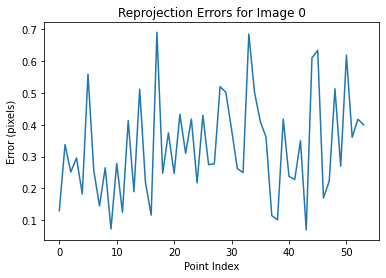

Reprojection errors for image 1: [0.5509242960991543, 0.2875432738617742, 0.5255100617913198, 0.2851767597922378, 0.17064378566869412, 0.4674380858369582, 0.12921152668959363, 0.09075736869236556, 0.2502754898904044, 0.2539558362225214, 0.09593895640805442, 0.11378629503639862, 0.30929992251281124, 0.08285481433520947, 0.3898414764643789, 0.4168039115733656, 0.3546210651105445, 0.33389318905653254, 0.31183365470378477, 0.5464336964829262, 0.21998320955717895, 0.37186169720746143, 0.11269734610535857, 0.42012941421600514, 0.4772913627784502, 0.5602773889198691, 0.2378959980876203, 0.1639865177045448, 0.3002255309760546, 0.1613118419788985, 0.6198212645913924, 0.5561377679992964, 0.28389093470059196, 0.0673541685396008, 0.223736634787648, 0.3408644901707575, 0.22995530332982625, 0.2958894545699213, 0.2025290329453805, 0.47293008800680886, 0.46132535295679156, 0.4873120416304187, 0.1289767448252552, 0.17924145608754494, 0.3835566935927247, 0.49350263096882024, 0.2251116320063387, 0.084898

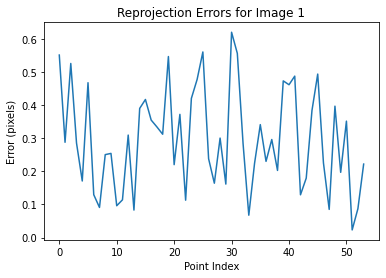

Reprojection errors for image 2: [0.11128938569771461, 0.6740892097971386, 0.3877562083504221, 0.16818614686218192, 0.15060988457208968, 0.129603954199526, 0.3490806502811835, 0.04649997737842953, 0.08051432457822585, 0.25921035159752553, 0.18590924865810185, 0.31360595623298865, 0.374614940080884, 0.30360025431310733, 0.19835704614294586, 0.2926025645256429, 0.11374208831520768, 0.14033839371286977, 0.25708425143514335, 0.364694226520811, 0.19326892818132707, 0.22834092986100055, 0.32304641465289197, 0.34344792097697796, 0.47856522906360865, 0.19486478990206138, 0.1776958046447419, 0.25863240376647445, 0.49586369218835635, 0.5168645906668689, 0.4974998012619005, 0.43482000485559497, 0.06378860071672689, 0.26256484298005733, 0.158248376850042, 0.4146871533424751, 0.5060210577134396, 0.124671459576433, 0.22993511716588363, 0.28458496244549764, 0.1915370338650858, 0.32620067811897796, 0.22780799526370873, 0.18191450247159494, 0.39912060540871536, 0.6105771464228149, 0.3552548582431395, 0

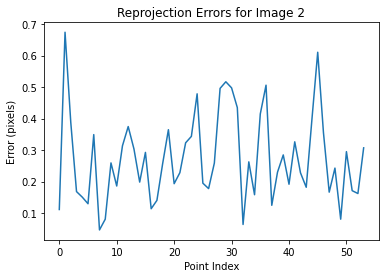

Reprojection errors for image 3: [0.1760144699878275, 0.6929519745904628, 0.40970789154452686, 0.1633381634864927, 0.08849424139242433, 0.2779415296979144, 0.3024646418769672, 0.09515010882825937, 0.19508459145396784, 0.2647447305304405, 0.29796273705027004, 0.2390559142583135, 0.40779832910346947, 0.1957288595704381, 0.2452779979497515, 0.28650388644446767, 0.11165083574886807, 0.1173278603799081, 0.24917902854142202, 0.37544676869945437, 0.11401510952486267, 0.3896404255973078, 0.23118986043681555, 0.2870633873472114, 0.38319753240301513, 0.24770981122199787, 0.3022277530658056, 0.07339360162823452, 0.22163606626214594, 0.29150986146195285, 0.8674463882287764, 0.6373768430377582, 0.4070816331019015, 0.2895755081811869, 0.1511356675111771, 0.4126773373561257, 0.14204038827704468, 0.1606313242019821, 0.24158044844614734, 0.5410650898599437, 0.3341531828865571, 0.3722388018684445, 0.10810806285085568, 0.20611011067105084, 0.4398335823252557, 0.2913630479077966, 0.25584132007056726, 0.10

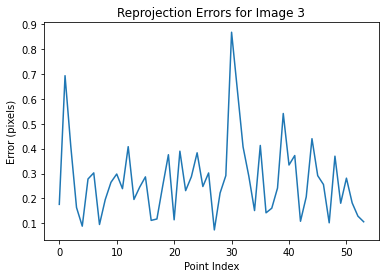

Reprojection errors for image 4: [0.03483990224625268, 0.5543463188254657, 0.34259300156135514, 0.2772217871910569, 0.28415729657346145, 0.327529116384572, 0.26712091742873556, 0.11249797607296727, 0.20028238031381157, 0.18603171197701548, 0.27734864593267816, 0.21245990718557364, 0.482592857423745, 0.28500291542603245, 0.19949430220696715, 0.3154878119896959, 0.18617863766469198, 0.19735172017026503, 0.23258339054245236, 0.31156973659180653, 0.1062503393953176, 0.4445002660696909, 0.23793542499604403, 0.3859784718437212, 0.3864174063707492, 0.34592551282119754, 0.21503166303801483, 0.20745002929074036, 0.3826076971788345, 0.4081604310117937, 0.47455569933124697, 0.32427254196110605, 0.2296887469095652, 0.16024628876243527, 0.22397909881370306, 0.4016371141869061, 0.4596799287684685, 0.13262725982844026, 0.13019645795710258, 0.3643293540591277, 0.12994939488530222, 0.38555813031836245, 0.11575458585087596, 0.21743368151700843, 0.36406690488450794, 0.47431830519103074, 0.303195829325820

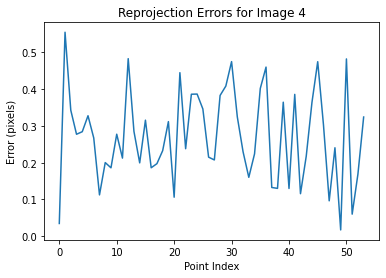

Reprojection errors for image 5: [0.4387503196302157, 0.3248890130186454, 0.2025948354799964, 0.47545584401325997, 0.297492138734703, 0.4550098318829782, 0.12957635736036024, 0.14810711080633654, 0.02787188971919306, 0.0946441764045546, 0.03603452769819364, 0.11126131428822943, 0.3107414835424979, 0.10470651766994948, 0.3561710504420652, 0.33249752739295274, 0.3317966529983773, 0.13978036904009442, 0.167881355171743, 0.23717769317306178, 0.2053623591228496, 0.41915923661206256, 0.3622583734980658, 0.5714199470503559, 0.4510618463749092, 0.23264708947362137, 0.15402564824776993, 0.27859486205798506, 0.5012735598157205, 0.2932886094179523, 0.4043094430342925, 0.12910919397741463, 0.32980217769706555, 0.1470619513375374, 0.31438156166585246, 0.4325466744369705, 0.31934809297064215, 0.5112166234339515, 0.17444989091648902, 0.35446515781560234, 0.20444590892892067, 0.5246038963503307, 0.15997569443447202, 0.3306800049815807, 0.3009357860452997, 0.14421459253999594, 0.22530744958314994, 0.11

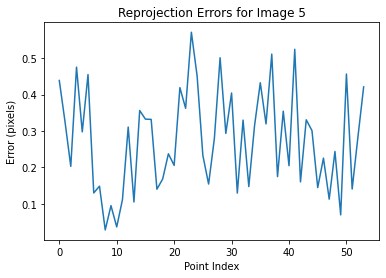

Reprojection errors for image 6: [0.2031924245877658, 0.38128652339059, 0.4936217120257427, 0.3419052224774441, 0.2224961089747664, 0.2790620790587323, 0.37576993738859915, 0.08461594969053919, 0.06611490853362229, 0.1014999233548575, 0.06795107293730986, 0.26706867726924394, 0.30271276581457945, 0.12021595685553543, 0.18057483841150632, 0.4264308803234089, 0.298069333371497, 0.11639965985992391, 0.2978758254878187, 0.34922437940664325, 0.12726819482483773, 0.27187018116155304, 0.07627323937773749, 0.4200865843908854, 0.5619283128720768, 0.37629983058725924, 0.3394438484425644, 0.16698580724116777, 0.23080942869066856, 0.29991970279082864, 0.5201718675876321, 0.3996773157693813, 0.17843327031241638, 0.14075004792847842, 0.09230001017197442, 0.19356402731647926, 0.3862406744977008, 0.4937754891552438, 0.553860171624916, 0.47239319913803324, 0.15110440978956297, 0.34966742177529586, 0.10982958806803182, 0.2416888918741621, 0.37721482516899857, 1.8108556004815732, 0.4383283260463846, 0.63

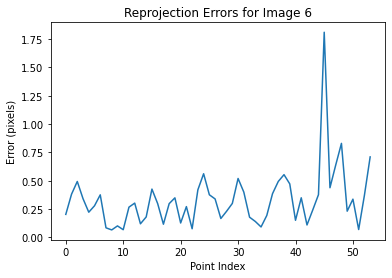

Reprojection errors for image 7: [0.20258233133311726, 0.37517254058822064, 0.2919875243462073, 0.2353231009214313, 0.12459571847252843, 0.4007325038675099, 0.2491566320512312, 0.016813053058192272, 0.26479401051038953, 0.3154539919722306, 0.1391088558471412, 0.06535551507264296, 0.32099620609031965, 0.13655581983905074, 0.31158076030974385, 0.412093270696765, 0.1714363135068349, 0.06673163747386478, 0.33563715793745197, 0.43821124182392984, 0.12324586551455667, 0.3895237849958971, 0.18018735936292016, 0.29189447535044954, 0.47663165982063294, 0.22928590634575216, 0.2939572569489232, 0.17040705199816306, 0.18911690717288626, 0.3803673329002138, 0.7295179758275663, 0.7520715793596373, 0.29150482637653147, 0.24412844818266116, 0.12186805754230608, 0.5142479773543308, 0.17240308782828148, 0.20876664557877386, 0.2694191630509653, 0.5768071697028916, 0.3359625607391381, 0.35482196863632354, 0.1869652194786931, 0.08766824351247574, 0.461773679664124, 0.33664347521924726, 0.1673684148483029, 

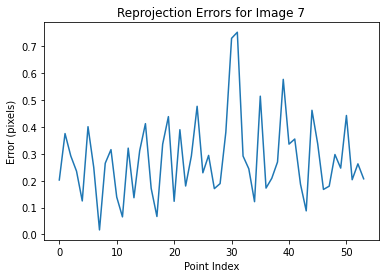

Reprojection errors for image 8: [0.22797087597133475, 0.46394403724530475, 0.3064382152331177, 0.3926137462036658, 0.37153366515980274, 0.31435049052472475, 0.19389907577731136, 0.16653701587272493, 0.16867577545193568, 0.20528212800217815, 0.13554869383985052, 0.06834555895015641, 0.48224962688429635, 0.26006947579501793, 0.25201832127386703, 0.23928773653949015, 0.24200571067038468, 0.16272137491546015, 0.16196229306082885, 0.33255154851852026, 0.0776895067703066, 0.4817528970489734, 0.3425983079382471, 0.5866164406518379, 0.4558868426078334, 0.48319617769864254, 0.15997499583489183, 0.22271784549474336, 0.42491425602950983, 0.3197024047897144, 0.4639947816138079, 0.26473988997487746, 0.24683051855408591, 0.09220479059516938, 0.3424118395271932, 0.39230802363475914, 0.3380478179086257, 0.25810440473160395, 0.15360098254229784, 0.29708827037819735, 0.15778724732752353, 0.43203406721027815, 0.15655583015290264, 0.3704443218104439, 0.3342352477037265, 0.4939343659020221, 0.333042428239

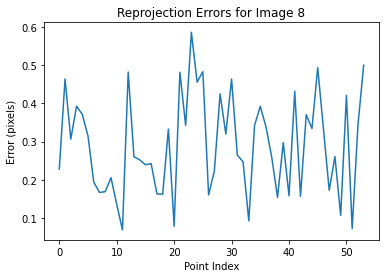

Reprojection errors for image 9: [0.22079314868663819, 0.14429278935388468, 0.32034683043565787, 0.3195278337757698, 0.16848520236876577, 0.22253873300419166, 0.17151070047311232, 0.09591852975975279, 0.22874807289228982, 0.314379316161921, 0.0276051695059706, 0.24798670361814631, 0.3343732922947138, 0.21122340853210414, 0.4031746857726289, 0.38252323763358914, 0.277695177963338, 0.23294557346112268, 0.4681253244528773, 0.349102419907327, 0.24378550833269103, 0.28748698930740196, 0.06042912015050614, 0.37336457789472277, 0.45046138968460153, 0.41824717027655484, 0.1965042472027277, 0.03704125023869889, 0.19364768987883682, 0.28620084402978213, 0.5780582389431154, 0.4309369907002693, 0.4758721651554466, 0.26915109472852927, 0.2227648503660037, 0.36019077176950165, 0.08365335211367646, 0.19542141738463475, 0.1187437357003156, 0.22367785137691715, 0.20851646163046525, 0.33270511685757215, 0.3105918803682177, 0.12366886969051738, 0.5376662159511321, 0.15970986659409322, 0.16114691470308787

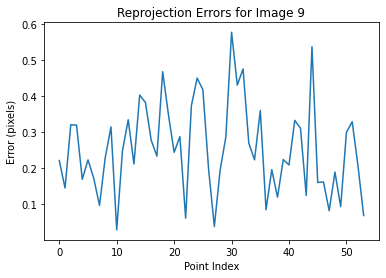

Reprojection errors for image 10: [0.14752495241450447, 0.5666399506507436, 0.28962936107042336, 0.2748746163459657, 0.06871574697312367, 0.3217648632540884, 0.2553566514666895, 0.09219727545165317, 0.20789273082837822, 0.10804300200608954, 0.22279169747936386, 0.17265650416912168, 0.3254341645894962, 0.18970390318030772, 0.26215283847889537, 0.2631243920489104, 0.13271069832475588, 0.32128210552996994, 0.33559014415535476, 0.2247754353864083, 0.13147613028087426, 0.2672759249970823, 0.09335641896184753, 0.39281509610989596, 0.38169309866400014, 0.251342150931493, 0.10812370608222586, 0.17431286933794146, 0.2253459710987851, 0.2563084163605567, 0.5394751033960169, 0.4637151529221593, 0.3327560815764123, 0.15878011718177723, 0.21974961901600246, 0.4062712003604736, 0.3942696676736765, 0.21080366940102824, 0.053223916135102356, 0.511793888195711, 0.14932228211542048, 0.30979138973115106, 0.041020166054886606, 0.15398994532496169, 0.4564270851632133, 0.24714958668166245, 0.203983701780063

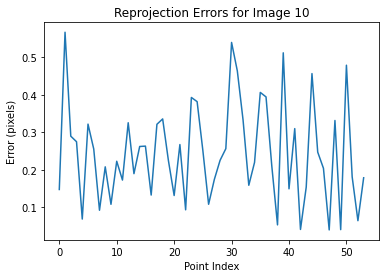

Reprojection errors for image 11: [0.28684944271693785, 0.1078187719538669, 0.35483385335138456, 0.4139035657635087, 0.360907500535465, 0.4086815799821654, 0.16095353759558687, 0.2676693558922049, 0.323862684589186, 0.3688775189597132, 0.15346894076115478, 0.1522087575020855, 0.39551205102980586, 0.11574898593285363, 0.38175906995454784, 0.2634899783554077, 0.09561069072922142, 0.11264677605758623, 0.31082268229193966, 0.3278224322084429, 0.2716117395463651, 0.3306891975380891, 0.25887023804252884, 0.5100974979423029, 0.47988107065359, 0.2533354946578105, 0.22656736697527005, 0.21372291192527212, 0.12950101106020695, 0.1933022231593319, 0.2750081321207501, 0.12325626298958416, 0.22862527938834046, 0.27224266032018785, 0.36566484042682834, 0.3941741876140039, 0.07501208287501167, 0.3150372026817827, 0.20234902422890974, 0.26909314360997144, 0.06824090774113506, 0.3932172971369844, 0.4586713332100074, 0.20210379877054677, 0.4700102395606125, 0.2366086697593426, 0.11635138735728862, 0.087

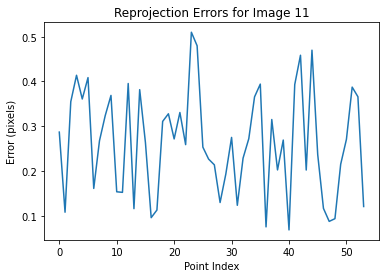

Reprojection errors for image 12: [0.3646081308605611, 0.3674498898862995, 0.25352616839239794, 0.3884599769392755, 0.271804565864736, 0.22629705861742708, 0.18223433728411073, 0.2498300988318987, 0.19992240354133436, 0.0631201789922346, 0.18407835817593451, 0.2418475379928155, 0.40140731870777, 0.22197505414265892, 0.38968381028007826, 0.3597643236101534, 0.22935920271148125, 0.06539016213019655, 0.32236077609008945, 0.36044794566617716, 0.1961166611619442, 0.3616015714093393, 0.3991622690756281, 0.6368025508099295, 0.5098471156204157, 0.2853694797872559, 0.08678443757777084, 0.2547394506443333, 0.6929918980952262, 0.47543005376219816, 0.39480308100606687, 0.17239530876364137, 0.2619833107248301, 0.25402559263349644, 0.3656053749751553, 0.5852742478508206, 0.28748976881025223, 0.24646080738695036, 0.09799306008157921, 0.2515069500382816, 0.06788799706608777, 0.39941529364734235, 0.37795273269455704, 0.345763486775671, 0.16998685493206586, 0.27756206892255375, 0.418578198226973, 0.1991

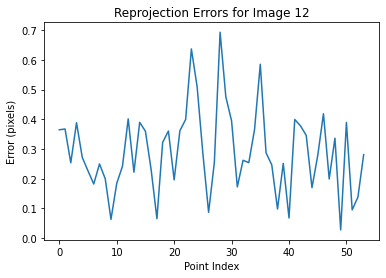

Reprojection errors for image 13: [0.16243449321281567, 0.2416554420977626, 0.4260044038079316, 0.4127759740005525, 0.07891154129869599, 0.2919039130338366, 0.42335450390133905, 0.0574012200192645, 0.31326676713376717, 0.21957857022436786, 0.15495084444587104, 0.24891106557168868, 0.23497707600078807, 0.01484748391821935, 0.29359909909477827, 0.6058905578104841, 0.2499501953582855, 0.1349222130431605, 0.3276449279211531, 0.0975601486372353, 0.26930705711652636, 0.1969682321349497, 0.19391897892881435, 0.37548859872792173, 0.6626663116216508, 0.37516004405551884, 0.3815428640825818, 0.3706133895650798, 0.20180264442930443, 0.5024965810184979, 0.43005100826526216, 0.3605443133989552, 0.2905504233545447, 0.5076423506684675, 0.23529359095616156, 0.47189498315902173, 0.4013790862090169, 0.21583163546725312, 0.27636236179843027, 0.10214455416648234, 0.3056526060059734, 0.33969235610649257, 0.6022717270793756, 0.06486805379942172, 0.5650618020158745, 0.4381483247019931, 0.41877905118575803, 0

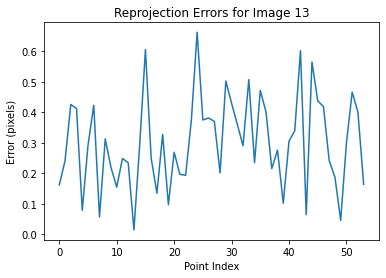

Reprojection errors for image 14: [0.23525429927908695, 0.29776953521377414, 0.28673942891526477, 0.3663428768263722, 0.11106642699611236, 0.29091860927013147, 0.2802205052385165, 0.08663458305185022, 0.2613934801543073, 0.4088823608428596, 0.11917815633494769, 0.21259549884113274, 0.3340109652815064, 0.19470659687377587, 0.24356068968546732, 0.45545289157590685, 0.1336346591530833, 0.04010084084761269, 0.2956021087223643, 0.21809404661806409, 0.1636225387032591, 0.2730986539236927, 0.14609144280391678, 0.3488447309259984, 0.6458433984284928, 0.39670395056159236, 0.13908776525230618, 0.049472373362205675, 0.13134277788483648, 0.4559940730784705, 0.5920445015401563, 0.5365682476982239, 0.2765711648305665, 0.2178575584211674, 0.2070463732827847, 0.39779935483947304, 0.18972903737964736, 0.049472373362205675, 0.29442845683258556, 0.33340823802164005, 0.31012291428842126, 0.3737706258753489, 0.2610212968143263, 0.08494944878433593, 0.5279514908036965, 0.2806201345620911, 0.2128326967153186

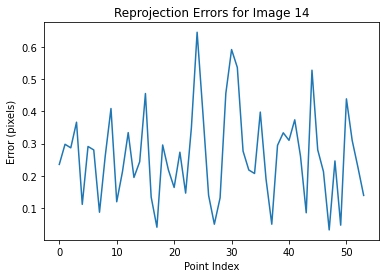

Reprojection errors for image 15: [0.4319094731156994, 0.3654588631625487, 0.35265995499469344, 0.3367640506868826, 0.34586464077594675, 0.33059548006435313, 0.1621031702531738, 0.17568021625794283, 0.1662969113613047, 0.20070420690700014, 0.18033434705756346, 0.12400506852254624, 0.4064448146276252, 0.13893349911261302, 0.2430222492255801, 0.3574474930050886, 0.16125673095198495, 0.26040161407200463, 0.1959196191443826, 0.4046281618263441, 0.12655408207249141, 0.32732047496707584, 0.16518959538851585, 0.46254131158411277, 0.43660516848495246, 0.2660276222604518, 0.23922324417447396, 0.1791912357724594, 0.4444375058301406, 0.12479414977478043, 0.596846749101503, 0.2842694432462367, 0.17353766530229708, 0.11277110230499351, 0.19702768611483046, 0.43115408908927066, 0.16282776138694086, 0.27481411725900745, 0.14921711426482484, 0.33695689495762865, 0.1369806233994608, 0.4683481719368951, 0.22767635018469948, 0.2126717448422989, 0.2789608728256661, 0.26995090626606705, 0.17739073051248566

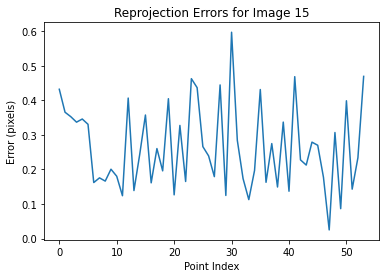

Reprojection errors for image 16: [0.15202165445938343, 0.6570604973269661, 0.38064882865475247, 0.4101848955596308, 0.4778624767565398, 0.18602330127499764, 0.3443329809346447, 0.15696519249893306, 0.17028493570674838, 0.265459121071441, 0.31785501418924056, 0.23121112934973997, 0.38946255334826274, 0.38017902740339055, 0.33050872434709644, 0.38741172969555554, 0.2531168771547187, 0.16989170552035276, 0.2353493860547746, 0.38574491089451, 0.19400367895796816, 0.30890967699541616, 0.3363954173256171, 0.4959882789292095, 0.5309721276103598, 0.43239796338911823, 0.303876531172629, 0.18455812121298568, 0.52868034026239, 0.5129891162272219, 0.38789975327491044, 0.264179221997097, 0.16600243011097648, 0.2228644217710243, 0.10852078243602765, 0.13617532906279803, 0.5825624697928435, 0.30281610308610685, 0.1926384403879338, 0.3065876337902707, 0.21338393425855237, 0.39179284045194945, 0.10647344654899916, 0.24494426448521048, 0.3167474343588117, 0.5428631117169249, 0.4506978149484775, 0.17442

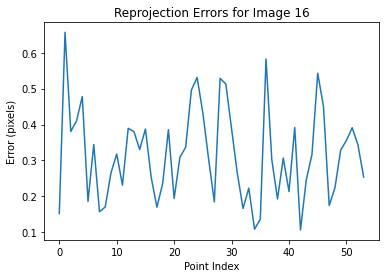

Reprojection errors for image 17: [0.2643832746973842, 0.17856618094397203, 0.5259656524659918, 0.47056496836359046, 0.42463904034145217, 0.4853141202242519, 0.3017372507046503, 0.18975264674880146, 1.2513503187080657, 0.46094309270019773, 0.053509873408294543, 0.21139279431971045, 0.4178407062947174, 0.29932056940615476, 0.28408227148796616, 0.18597403095319545, 0.3488615765396411, 0.11403039976991132, 0.5427544397280603, 0.4204726266912604, 0.11857855429315915, 0.32841453947465526, 0.1573590496394332, 0.4119133867427371, 0.5399727530581346, 0.31132010398114335, 0.4875855181340882, 0.158076954202972, 0.35044415935722334, 0.25150250643558125, 0.5782293438182439, 0.3573222412321548, 0.21545392865830526, 0.4870554835312081, 0.1816249553525467, 0.6871097605900987, 0.18335189513141728, 0.2974079017172423, 0.4420492544178586, 0.3056524597500822, 0.3625799814319327, 0.3465673345189033, 0.6013560745981666, 0.23663401708132897, 0.4953540634141475, 0.250163628256721, 0.10765605024034103, 0.3048

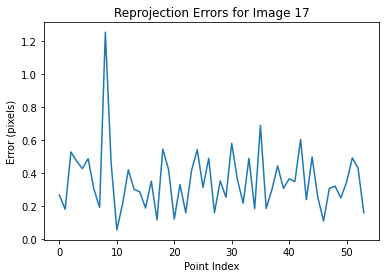

Reprojection errors for image 18: [0.6122957225915947, 0.2658038098484165, 0.5630643748515652, 0.24746396063664378, 0.09744745822569627, 0.4185717146236404, 0.17726290704518904, 0.17849000709408436, 0.20345547275874623, 0.2338832783296674, 0.025045915995780696, 0.1387776253666502, 0.23682899048394093, 0.07433470652328283, 0.3886357199563674, 0.4763040623555089, 0.31311832291418573, 0.35190355923552713, 0.44895606031159596, 0.3764523554807415, 0.22163478883973287, 0.27304493790186346, 0.04073144465691607, 0.5240859669371359, 0.5211453282167451, 0.5345559477487598, 0.2823129541504496, 0.17731421976798425, 0.3247002679794499, 0.2669014065495865, 0.617579203055187, 0.4577673339697267, 0.3987680447839345, 0.09866211710785132, 0.16972997945104965, 0.30674265725100053, 0.20280608487379798, 0.3221691565189627, 0.24164203005757456, 0.5232556867121879, 0.45611075275193846, 0.410073880598618, 0.08048979845031004, 0.1159585728991811, 0.3558125981260882, 0.48137952188682437, 0.21757960567278736, 0.

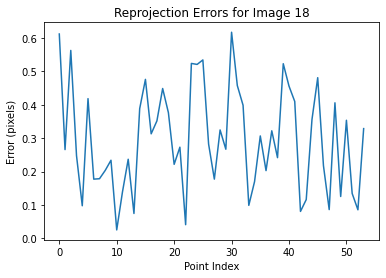

In [42]:
# Calculate the reprojection error for each image
for i, imgpoint in enumerate(imgpoints):
    # Project the object points onto the image plane
    projected_points, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    
    # Calculate the reprojection error for each image point
    errors = []
    for j in range(len(imgpoint)):
        error = cv.norm(imgpoint[j], projected_points[j], cv.NORM_L2)
        errors.append(error)
    
    # Print the reprojection errors for the current image
    print(f'Reprojection errors for image {i}: {errors}')
    
    # Plot the reprojection errors for the current image
    plt.figure()
    plt.plot(errors)
    plt.title(f'Reprojection Errors for Image {i}')
    plt.xlabel('Point Index')
    plt.ylabel('Error (pixels)')
    plt.show()

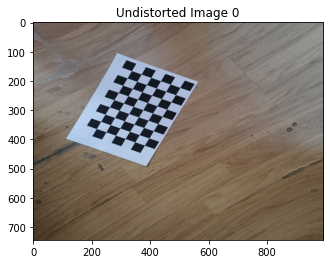

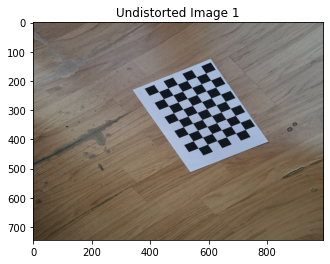

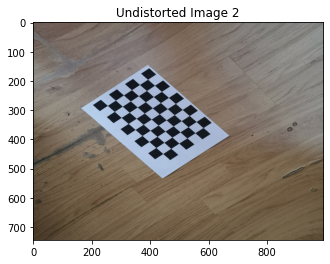

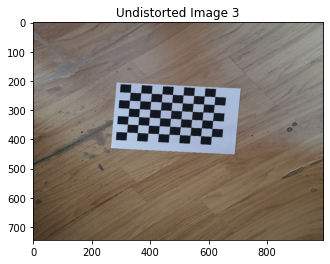

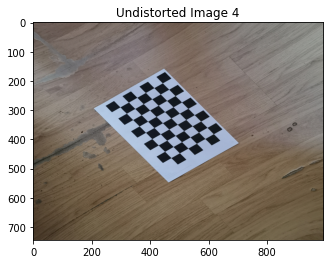

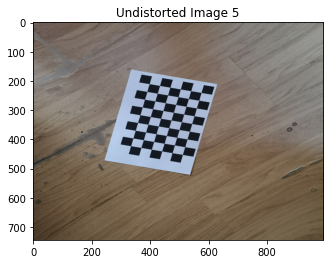

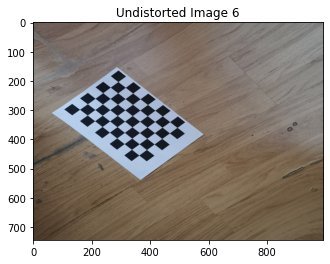

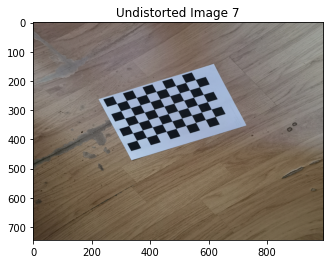

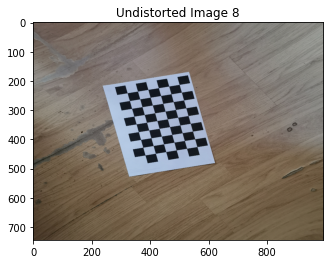

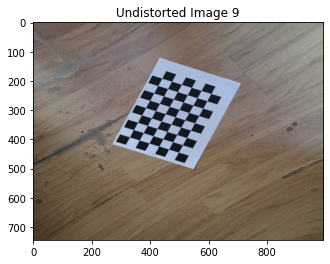

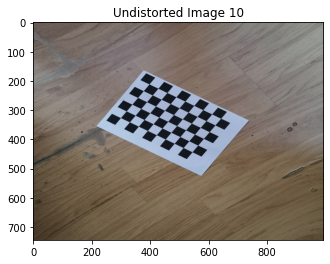

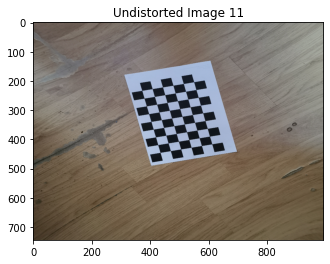

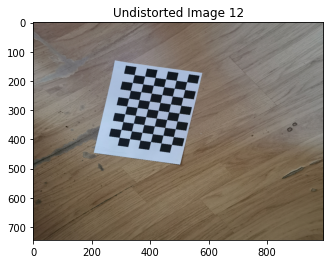

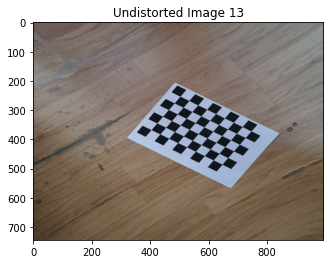

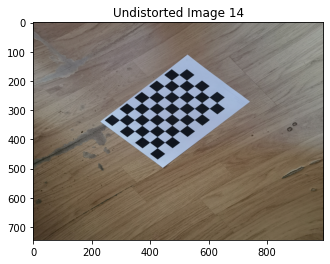

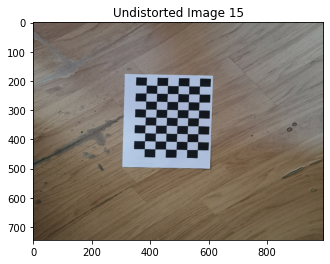

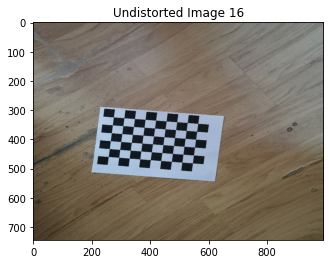

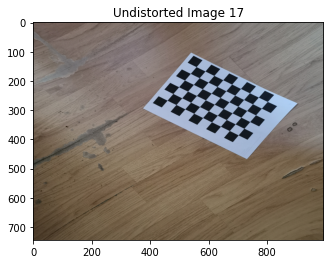

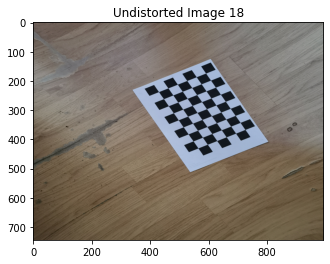

In [43]:
for i, fname in enumerate(images):
    img = cv.imread(fname)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    # Display the undistorted image with its index
    plt.imshow(dst[:,:,::-1])
    plt.title(f'Undistorted Image {i}')
    plt.show()

In [41]:
print("Re-projection error: ", ret) 
#image set 1: 0,84 (25mm)
#image set 2,3: 0.32 (25mm) ---------------------------------------------------
#image set 4 smaller: 0,75 (13mm)
#image set wall 1: 1.05 (13mm)
#image set wall 1 BIG : 0.9 (25mm)
#image set wall 2 BIG__far: 0.23 (25mm)
#image set wall 3 BIG__far: 0.177 (25mm)
#image set wall BIG__far 2 és 3 combined: 0.211 (25mm)
#image set wardrobe combined: 0,43 (25mm)
#image set wardrobe far: 0.1699 (25mm) ----------------------------------------
#image set midfarZOOM 0.58 (25mm)
#image set wardrobe far filtered: 0.1705 (25mm)

Re-projection error:  0.32708009893976786


In [44]:
print(newcameramtx)
print(ret)
print(mtx)
print(dist)
print(tvecs)

[[7.91843262e+03 0.00000000e+00 1.36583464e+03]
 [0.00000000e+00 5.95788184e+03 1.41851942e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
0.32708009893976786
[[2.18245959e+04 0.00000000e+00 1.34057620e+03]
 [0.00000000e+00 2.19152867e+04 1.37966465e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 9.69433068e+00 -4.18278460e+03  1.92181654e-02  3.75881001e-03
  -1.12877792e+01]]
(array([[  10.64905268],
       [-138.3258301 ],
       [5452.36738074]]), array([[  71.31534099],
       [-183.07441604],
       [5444.65843807]]), array([[ -65.11531781],
       [-163.69508746],
       [5449.71070781]]), array([[-106.41519359],
       [-123.37768737],
       [5470.0305286 ]]), array([[ -30.4487603 ],
       [-152.51442312],
       [5453.75354999]]), array([[  60.5643163 ],
       [-122.57241081],
       [5449.96567245]]), array([[-134.84942826],
       [-156.58289684],
       [5454.07794247]]), array([[-138.24662172],
       [ -88.7613869 ],
       [5468.77607069]]), array([[   